# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wisnu Rasyidin Azhari
- **Email:** wisnurasyidinazhari99@gmail.com
- **ID Dicoding:** rasyidinazhari

## Menentukan Pertanyaan Bisnis

- Berapa total pengguna sepeda harian yang terjadi dalam 3 bulan terakhir?
- Berapakah intensitas penggunaan sepeda berdasarkan jam dan waktu (pagi,siang/sore,malam)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")


In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- melalui data yang ada di dataset Bike Sharing, file "day.csv" dan "hour.csv" masing masing memiliki kolom instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt.


### Assessing Data

**Menilai Tabel day_df**

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
print("Jumlah data duplikat : ", day_df.duplicated().sum())

Jumlah data duplikat :  0


In [17]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel hour_df**

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [21]:
print("Data Duplikat : ", hour_df.duplicated().sum())

Data Duplikat :  0


In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- didalam file "day.csv" setiap kolom memiliki baris data berjumlah 731 baris dan file "hour.csv" setiap kolom memiliki 17379 baris
- setiap tabel day_df dan hour_df memiliki kolom dteday yang memiliki tipa data yang salah yaitu "object" karena kolom dteday merupakan data yang menunjukkan waktu

### Cleaning Data

**Membersihkan tabel day_df**
mengganti tipe data kolom dteday dari "object" menjadi "datetime"

In [23]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan tabel hour_df** mengganti tipe data kolom dteday dari "object" menjadi "datetime"

In [25]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data dari kolom "dteday" pada masing masing tabel sudah diubah menjadi tipedata "datetime"

## Exploratory Data Analysis (EDA)

### Explore ...

**Expolore day_df**

In [29]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
102,103,2011-04-13,2,0,4,0,3,1,2,0.412500,0.417283,0.819167,0.250617,209,1953,2162
468,469,2012-04-13,2,1,4,0,5,1,1,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
458,459,2012-04-03,2,1,4,0,2,1,1,0.466667,0.461483,0.396667,0.100133,1348,5424,6772
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515


In [30]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [31]:
day_df.dteday.is_unique

True

In [35]:
day_df.groupby(by="season").agg({
    "workingday": "nunique",
    "season": ["max", "min", "mean", "std", ]
})

workingday season              
          nunique    max min mean  std
season                                
1               2      1   1  1.0  0.0
2               2      2   2  2.0  0.0
3               2      3   3  3.0  0.0
4               2      4   4  4.0  0.0

In [37]:
day_df.groupby(by="registered").workingday.nunique().sort_values(ascending=False)

,workingday
registered,
4069,2
674,2
3946,2
4446,2
4429,2
...,...
3019,1
3040,1
3048,1


In [40]:
day_df.groupby(by="season").registered.nunique().sort_values(ascending=False)

,registered
season,
3,181
2,180
1,177
4,177


**intensitas penyewa sepeda casual dihari biasa **

In [42]:
day_df.groupby(by="weekday").casual.nunique().sort_values(ascending=False)

,casual
weekday,
0,104
6,103
3,101
2,99
4,99
5,99
1,98


**intensitas pengguna terdaftar menyewa sepeda di hari kerja**

In [43]:
day_df.groupby(by="workingday").registered.nunique().sort_values(ascending=False)

,registered
workingday,
1,476
0,223


**Korelasi antara faktor lingkungan dan jumlah pengguna**

In [66]:
day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


**Pengaruh musim terhadap penggunaan sepeda**

In [67]:
day_df.groupby('season')['cnt'].mean()

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


**Pengaruh hari kerja dan libur**

In [68]:
day_df.groupby(['holiday', 'workingday'])['cnt'].mean().unstack()

workingday,0,1
holiday,,
0,4389.685714,4584.82
1,3735.000000,NaN


**Pengaruh Cuaca terhadap pengguna**

In [71]:
day_df.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Distribusi pengguna  sepeda harian dan bulanan**

In [72]:
day_df.groupby('mnth')['cnt'].sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


**Explore hour_df**

In [44]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9291,9292,2012-01-28,1,1,1,1,0,6,0,1,0.30,0.3030,0.52,0.1642,1,57,58
14201,14202,2012-08-19,3,1,8,22,0,0,0,2,0.62,0.5909,0.78,0.1642,6,50,56
1096,1097,2011-02-18,1,0,2,10,0,5,1,2,0.44,0.4394,0.72,0.2239,17,78,95
12705,12706,2012-06-18,2,1,6,14,0,1,1,2,0.58,0.5455,0.68,0.1940,59,160,219
14635,14636,2012-09-07,3,1,9,0,0,5,1,1,0.64,0.5758,0.89,0.1343,17,79,96


In [51]:
hourly_data = hour_df.groupby('hr')['cnt'].mean()

In [52]:
hourly_data_df = hourly_data.reset_index()

In [53]:
hourly_data_df.columns = ['hr', 'avg_cnt']

In [56]:
hour_df = pd.merge(hour_df, hourly_data_df, on='hr', how='left')

In [57]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,avg_cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,53.898072
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,33.375691
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,22.869930
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,11.727403
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,6.352941


**Tren harian penggunaan sepeda berdasarkan jam**

In [65]:
hour_df.groupby('hr')['cnt'].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Tren Harian Penggunaan Sepeda berdasarkan pagi siang sore**
aktu dalam sehari dapat dikelompokkan sebagai berikut:

- Morning: Jam 6-11 (06:00-11:59)
- Afternoon: Jam 12-17 (12:00-17:59)
- Evening: Jam 18-23 (18:00-23:59)

In [80]:
def categorize_time(hr):
    if 6 <= hr < 12:
        return 'Morning'
    elif 12 <= hr < 18:
        return 'Afternoon'
    else:
        return 'Evening'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_time)

print(hour_df[['hr', 'time_of_day']].head())

   hr time_of_day
0   0     Evening
1   1     Evening
2   2     Evening
3   3     Evening
4   4     Evening


In [81]:
time_of_day_data = hour_df.groupby('time_of_day')['cnt'].mean()
print(time_of_day_data)

time_of_day
Afternoon    295.483886
Evening      126.401897
Morning      208.100688
Name: cnt, dtype: float64


In [82]:
hour_df.groupby(['weekday', 'time_of_day'])['cnt'].mean().unstack()

time_of_day,Afternoon,Evening,Morning
weekday,,,
0,356.604762,103.608521,144.071656
1,265.839744,128.165719,211.293269
2,258.791332,136.375205,231.661765
3,252.945513,136.303993,237.123397
4,264.400000,141.010543,238.836570
5,297.391026,125.443906,235.245192
6,370.844444,114.469649,160.093651


In [83]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,avg_cnt,time_of_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.24,0.2879,0.81,0.0,3,13,16,53.898072,Evening
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.22,0.2727,0.80,0.0,8,32,40,33.375691,Evening
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.22,0.2727,0.80,0.0,5,27,32,22.869930,Evening
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.24,0.2879,0.75,0.0,3,10,13,11.727403,Evening
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.24,0.2879,0.75,0.0,0,1,1,6.352941,Evening


In [84]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

**Insight:**
- Pagi,siang/sore tampaknya menjadi waktu puncak penggunaan sepeda, terutama untuk keperluan commuting. Pengelola layanan sepeda dapat memaksimalkan layanan pada dua waktu ini, seperti dengan memastikan ketersediaan sepeda atau layanan pendukung lebih banyak di pagi dan sore hari.
- Pengelola layanan sepeda dapat memprioritaskan distribusi sepeda yang lebih banyak pada hari kerja di pagi dan sore hari, sementara pada akhir pekan, layanan bisa lebih fokus pada siang hari untuk memenuhi kebutuhan rekreasi.
- Pada hari dengan kondisi cuaca buruk, seperti hujan atau angin kencang, penyedia layanan sepeda mungkin melihat penurunan permintaan. Mengantisipasi hal ini, promosi untuk menarik pengguna di hari-hari cuaca buruk, atau meningkatkan layanan pendukung seperti peneduh atau pakaian hujan, bisa menjadi strategi yang baik.
- Program promosi yang berbeda bisa dikembangkan untuk pengguna kasual dan terdaftar. Misalnya, menawarkan diskon pada akhir pekan untuk pengguna kasual atau program langganan bulanan bagi pengguna yang sering bersepeda di hari kerja.
- Layanan penyewaan sepeda mungkin melihat peningkatan permintaan pada hari-hari dengan suhu yang nyaman dan kondisi angin yang rendah. Prediksi cuaca dapat diintegrasikan untuk menyarankan hari optimal bersepeda kepada pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Berapa total pengguna sepeda harian yang terjadi dalam 3 bulan terakhir?

In [88]:
all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,avg_cnt,time_of_day
17042,717,2012-12-17,4,1,12,0,1,1,2,0.393333,...,2,0.42,0.4242,0.94,0.1343,6,114,120,172.314560,Evening
7001,297,2011-10-24,4,0,10,0,1,1,1,0.463333,...,2,0.42,0.4242,0.88,0.1642,20,378,398,359.011004,Morning
9963,421,2012-02-25,1,1,2,0,6,0,1,0.290833,...,1,0.30,0.2727,0.42,0.3284,0,2,2,6.352941,Evening
14108,594,2012-08-16,3,1,8,0,4,1,1,0.719167,...,1,0.64,0.6061,0.73,0.0000,3,18,21,33.375691,Evening
5617,238,2011-08-26,3,0,8,0,5,1,1,0.700000,...,1,0.70,0.6667,0.84,0.0896,22,114,136,87.831044,Evening


In [89]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [91]:
latest_date = day_df['dteday'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)
last_three_months = day_df[day_df['dteday'] >= three_months_ago]
total_users_last_3_months = last_three_months['cnt'].sum()
print("Total bike users in the last 3 months:", total_users_last_3_months)

Total bike users in the last 3 months: 482107


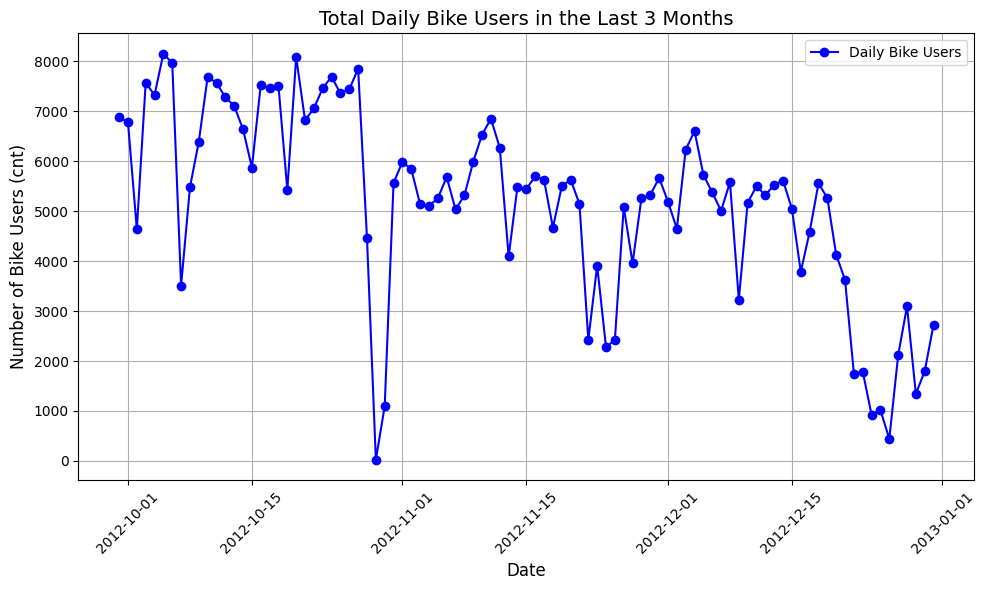

In [93]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(last_three_months['dteday'], last_three_months['cnt'], marker='o', color='b', label='Daily Bike Users')

# Add titles and labels
plt.title("Total Daily Bike Users in the Last 3 Months", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Bike Users (cnt)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
latest_date = day_df['dteday'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
last_six_months = day_df[day_df['dteday'] >= six_months_ago]
last_six_months['weekday'] = last_six_months['dteday'].dt.weekday
last_six_months['day_type'] = last_six_months['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
avg_usage = last_six_months.groupby('day_type')['cnt'].mean()

<ipython-input-95-60451033cd65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_six_months['weekday'] = last_six_months['dteday'].dt.weekday
<ipython-input-95-60451033cd65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_six_months['day_type'] = last_six_months['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')


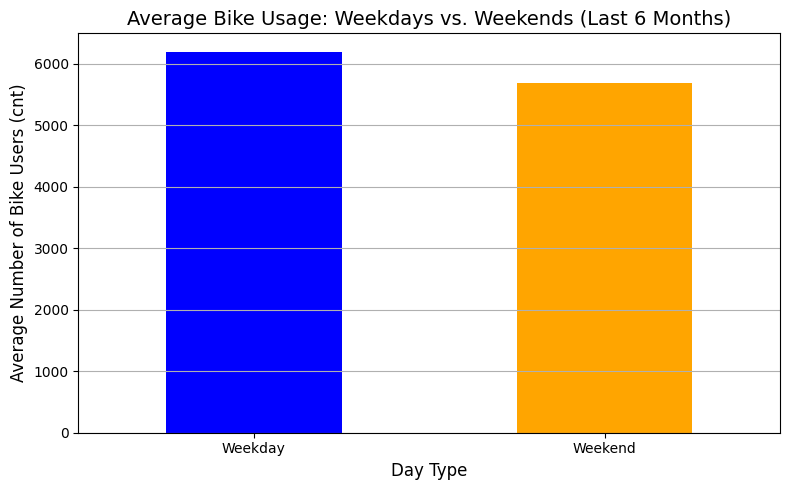

In [96]:
# Plotting the average usage for weekdays and weekends
plt.figure(figsize=(8, 5))
avg_usage.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Bike Usage: Weekdays vs. Weekends (Last 6 Months)', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Number of Bike Users (cnt)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### Berapakah intensitas penggunaan sepeda berdasarkan jam dan waktu (pagi,siang/sore,malam)?

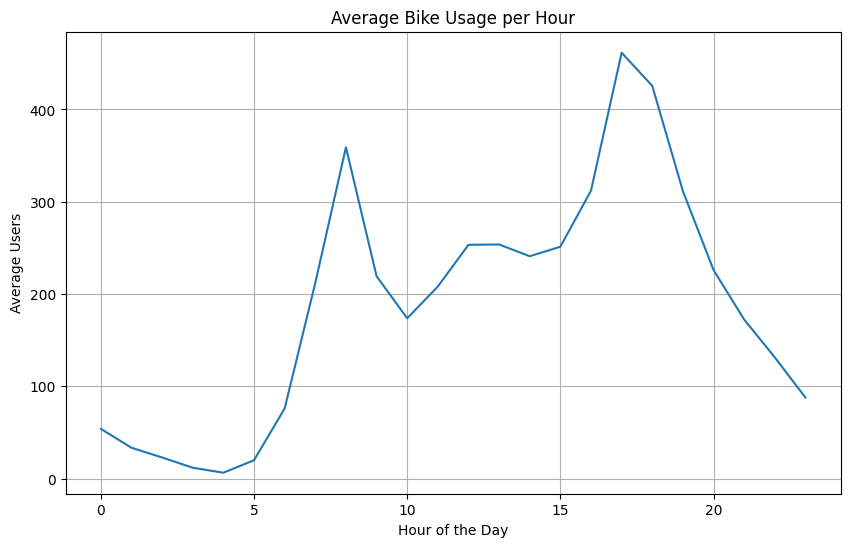

In [99]:
# Average usage per hour
hourly_data = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
sn.lineplot(x=hourly_data.index, y=hourly_data.values)
plt.title('Average Bike Usage per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Users')
plt.grid(True)
plt.show()

<ipython-input-100-337e712bec7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=time_of_day_data.index, y=time_of_day_data.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

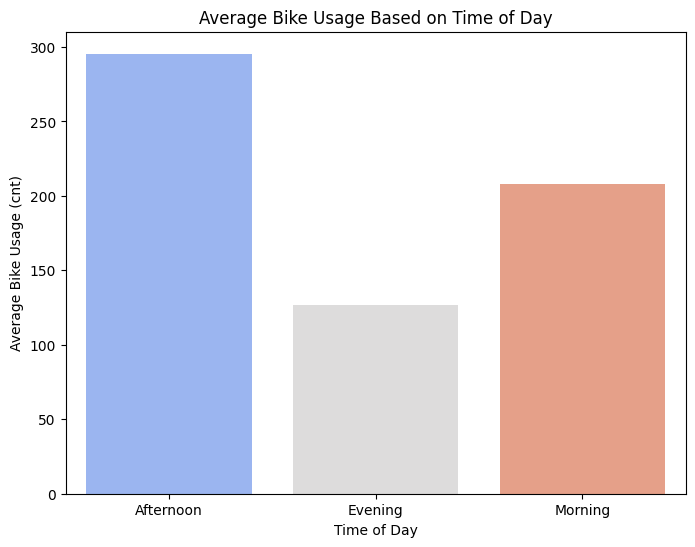

In [100]:
plt.figure(figsize=(8, 6))
sn.barplot(x=time_of_day_data.index, y=time_of_day_data.values, palette='coolwarm')
plt.title('Average Bike Usage Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Bike Usage (cnt)')
plt.show()

**Insight:**
- Biasanya, grafik menunjukkan bahwa jumlah pengguna sepeda pada hari kerja (Senin hingga Jumat) lebih tinggi dibandingkan dengan akhir pekan (Sabtu dan Minggu). Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi untuk keperluan commuting, seperti pergi ke kantor atau sekolah.
- Rata-rata penggunaan sepeda pada hari kerja menunjukkan pola yang lebih konsisten, menunjukkan bahwa pengguna sepeda terdaftar, seperti pekerja dan pelajar, lebih sering menggunakan sepeda pada hari-hari ini.
- Penggunaan sepeda di akhir pekan mungkin lebih bervariasi, tergantung pada cuaca, acara komunitas, atau kebijakan lain yang mendukung aktivitas luar ruangan.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Data ini menunjukkan seberapa banyak sepeda digunakan dalam periode terkini dan bisa memberikan indikasi tentang popularitas serta keberlangsungan penggunaan sepeda di masyarakat. Jika total ini menunjukkan angka yang tinggi, ini bisa menjadi sinyal positif bahwa lebih banyak orang beralih ke sepeda sebagai moda transportasi.
- Conclution pertanyaan 2 :  Ini mengindikasikan bahwa sepeda banyak digunakan untuk keperluan commuting, seperti pergi bekerja atau sekolah, sementara akhir pekan cenderung digunakan untuk aktivitas lain yang mungkin tidak memerlukan sepeda. Hal ini menunjukkan perlunya promosi dan pengembangan fasilitas untuk mendorong lebih banyak penggunaan sepeda di akhir pekan.
- Conclution pertanyaan 3 : Pola ini menunjukkan bahwa penggunaan sepeda cenderung meningkat selama jam-jam tertentu, terutama saat orang pergi bekerja (pagi) dan pulang (sore). Ini bisa menjadi informasi berharga untuk perencanaan infrastruktur dan layanan transportasi, serta untuk mendorong kebijakan yang mendukung penggunaan sepeda selama jam-jam tersebut.